In [50]:
import pandas as pd 
filepath = 'spambase.data'
data = pd.read_csv(filepath, header = None)

with open('spambase.names', 'r') as file:
    lines = file.readlines()

# Initialize containers for metadata and features
metadata = []
features = []

# Process each line
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespace
    if ":" in line and line.startswith('|'):  # Metadata lines start with "|"
        metadata.append(line.lstrip('|').strip())  # Remove '|' and clean the line
    elif ":" in line:  # Feature definitions have ":"
        features.append(line.split(":")[0].strip())  # Extract the feature name

# Print results for verification
print("Metadata:")
for meta in metadata:
    print(meta)

print("\nFeature Names:")
for feature in features:
    print(feature)

data.columns = features + ["Class"]

print(data.head())

Metadata:
UCI Machine Learning Repository: http://www.ics.uci.edu/~mlearn/MLRepository.html

Feature Names:
word_freq_make
word_freq_address
word_freq_all
word_freq_3d
word_freq_our
word_freq_over
word_freq_remove
word_freq_internet
word_freq_order
word_freq_mail
word_freq_receive
word_freq_will
word_freq_people
word_freq_report
word_freq_addresses
word_freq_free
word_freq_business
word_freq_email
word_freq_you
word_freq_credit
word_freq_your
word_freq_font
word_freq_000
word_freq_money
word_freq_hp
word_freq_hpl
word_freq_george
word_freq_650
word_freq_lab
word_freq_labs
word_freq_telnet
word_freq_857
word_freq_data
word_freq_415
word_freq_85
word_freq_technology
word_freq_1999
word_freq_parts
word_freq_pm
word_freq_direct
word_freq_cs
word_freq_meeting
word_freq_original
word_freq_project
word_freq_re
word_freq_edu
word_freq_table
word_freq_conference
char_freq_;
char_freq_(
char_freq_[
char_freq_!
char_freq_$
char_freq_#
capital_run_length_average
capital_run_length_longest
capital_

In [51]:
print(data.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [52]:
# Show basic information and stats
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

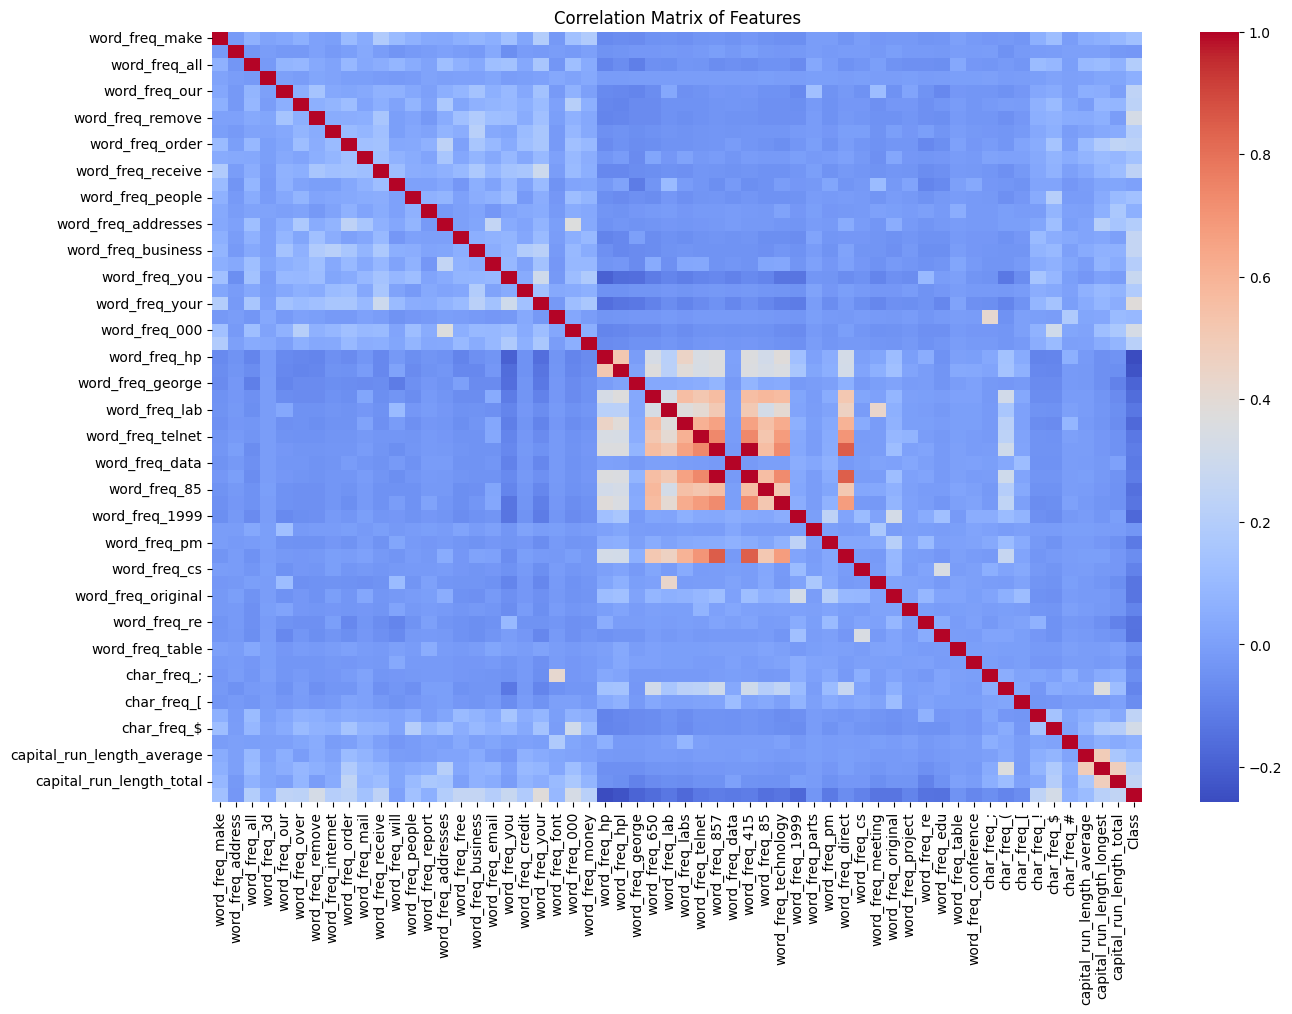

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()


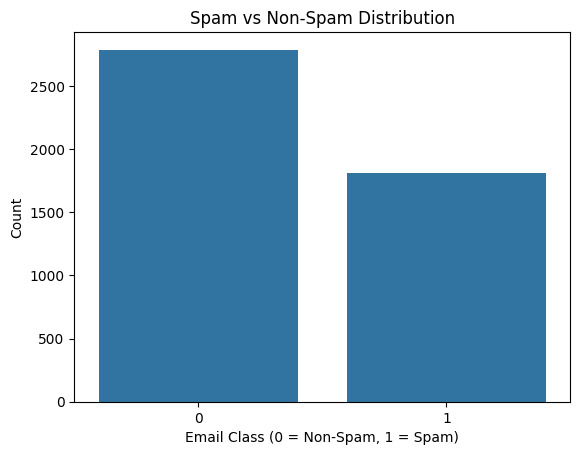

In [54]:
sns.countplot(x="Class", data=data)
plt.title("Spam vs Non-Spam Distribution")
plt.xlabel("Email Class (0 = Non-Spam, 1 = Spam)")
plt.ylabel("Count")
plt.show()


In [55]:
print(data.isnull().sum())


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

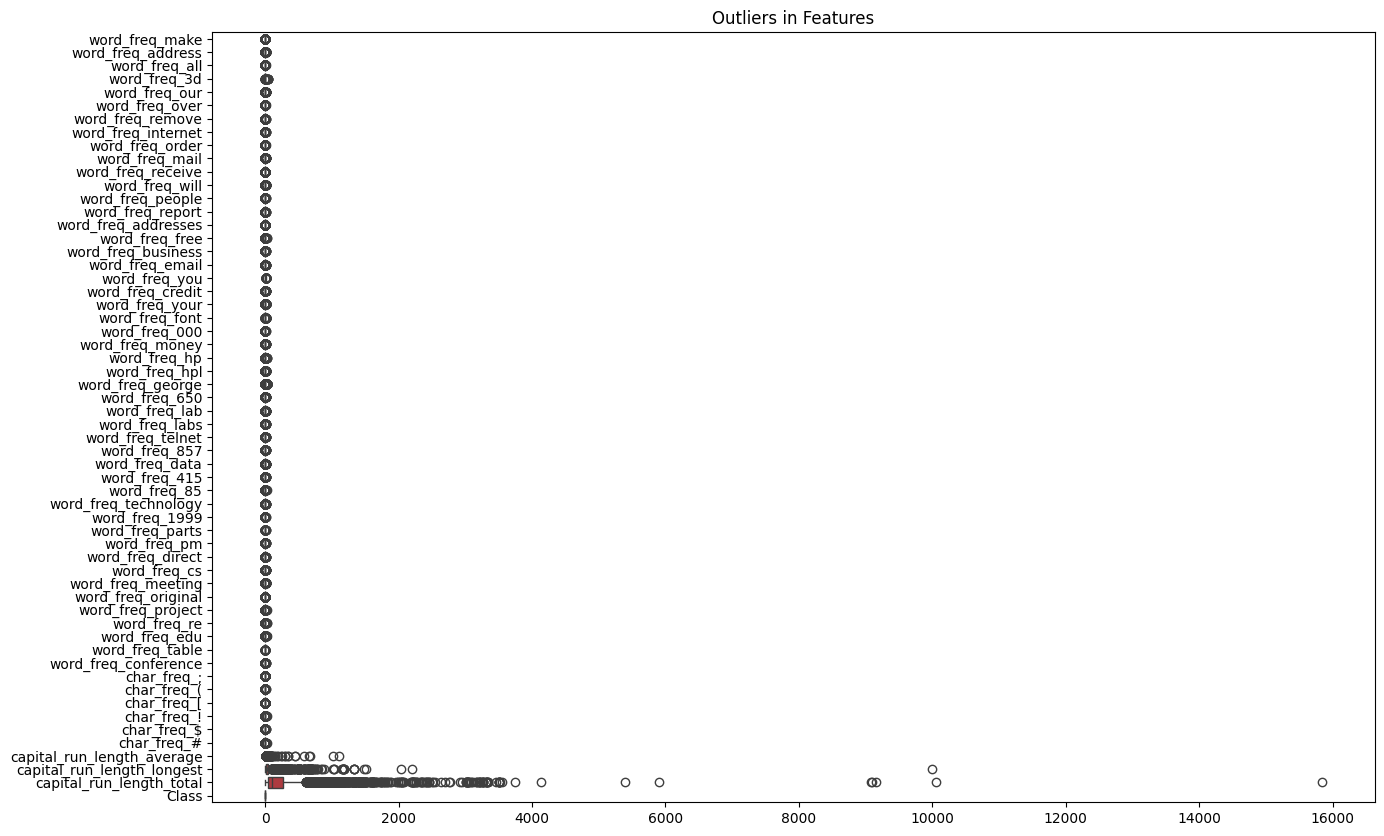

In [56]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient="h", palette="coolwarm")
plt.title("Outliers in Features")
plt.show()


In [57]:
# Handling outliers by capping values
for col in data.columns[:-1]:  # Exclude target column
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower_bound, upper_bound)


In [58]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature columns
scaler = StandardScaler()
data[features[:-1]] = scaler.fit_transform(data[features[:-1]])


In [ ]:
from sklearn.model_selection import train_test_split

X = data[features[:-1]]  # All columns except 'Class'
y = data['Class']             # The target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [61]:
print((X_train < 0).any().sum(), "columns have negative values.")


13 columns have negative values.


In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8508
Precision: 0.8630
Recall: 0.7643
F1 Score: 0.8107
